In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
# here few misconception is there like BMI cannot be zero  BP can't be zero, glucose, insulin can't be zero let's try to handle it
# Now Replaicing the Zero values 0 woth the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [66]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

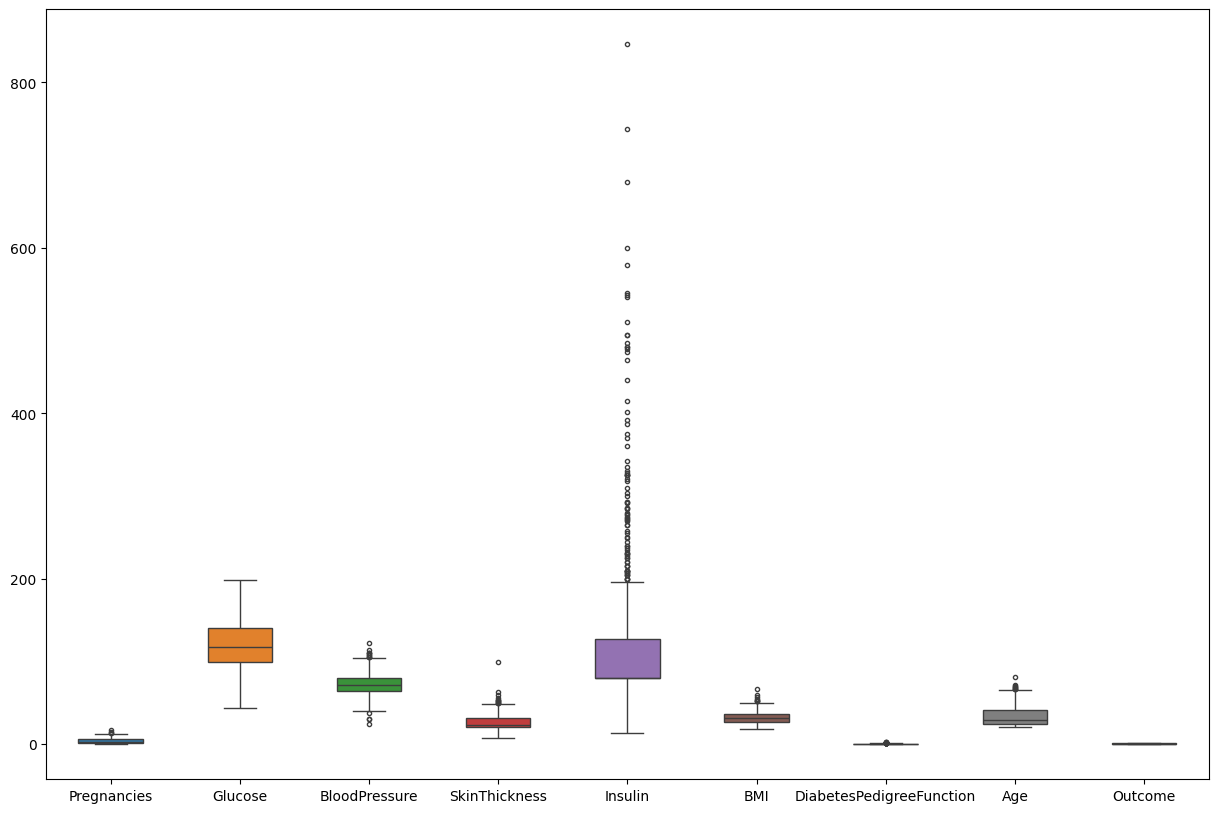

In [67]:
# Now we have deal with 0 values and data looks better , but there still are outliers present in some columns in the dataset
# Now let's Visualize the Data
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

<Axes: >

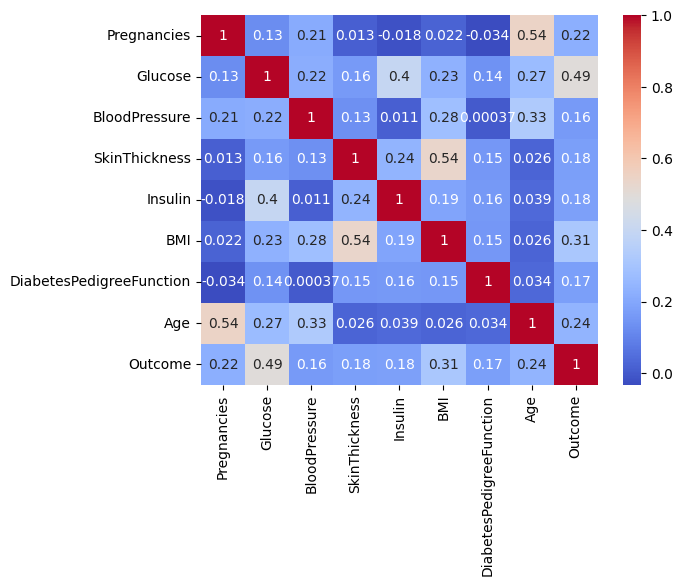

In [68]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

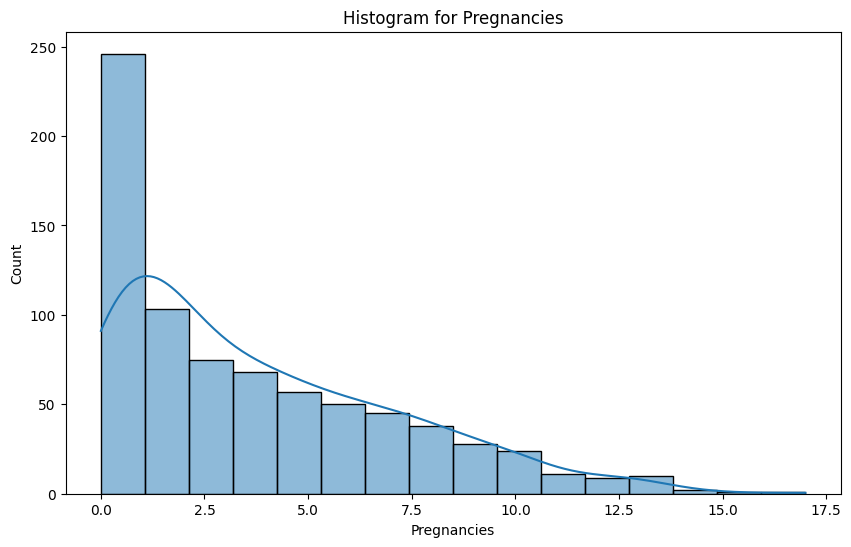

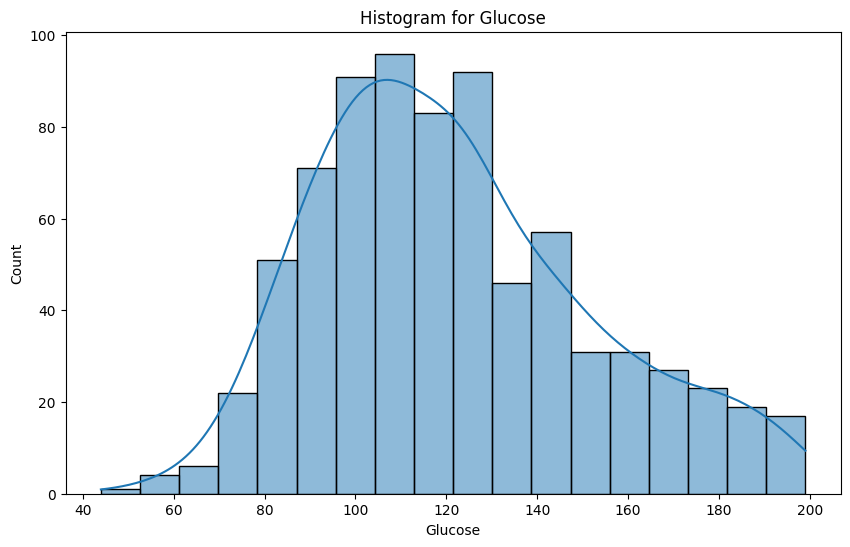

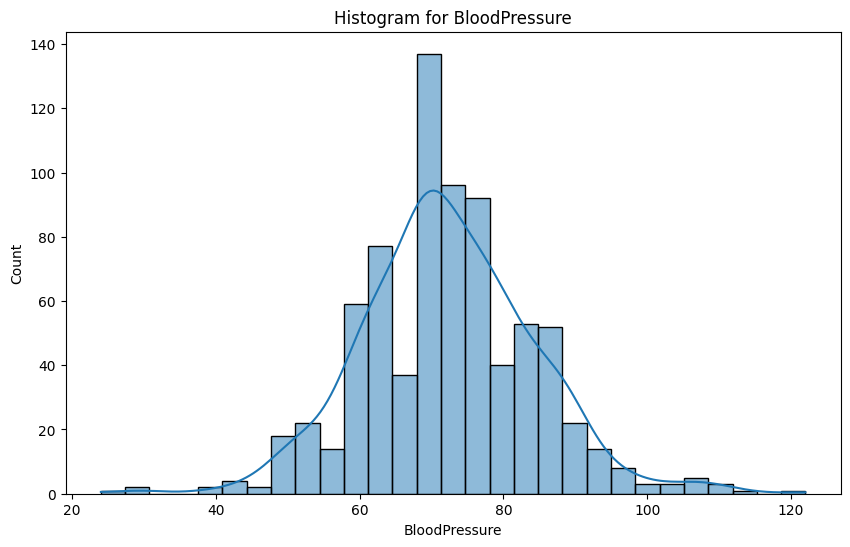

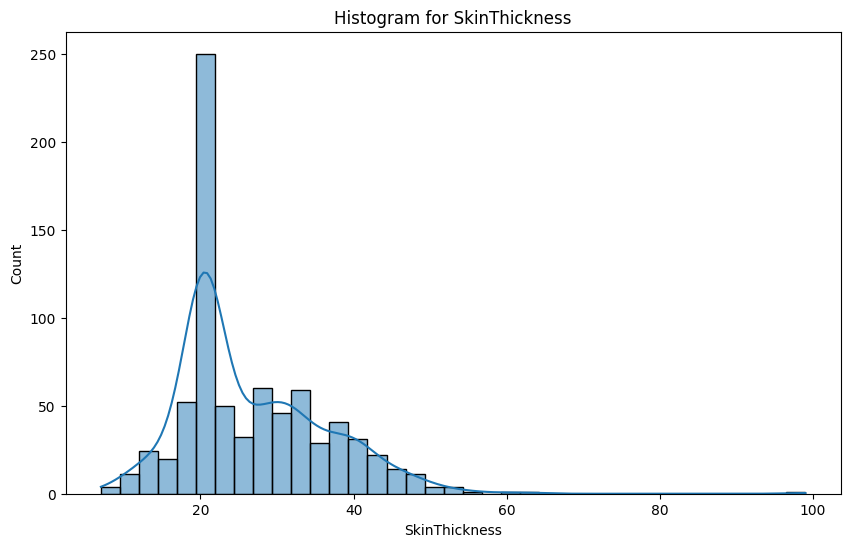

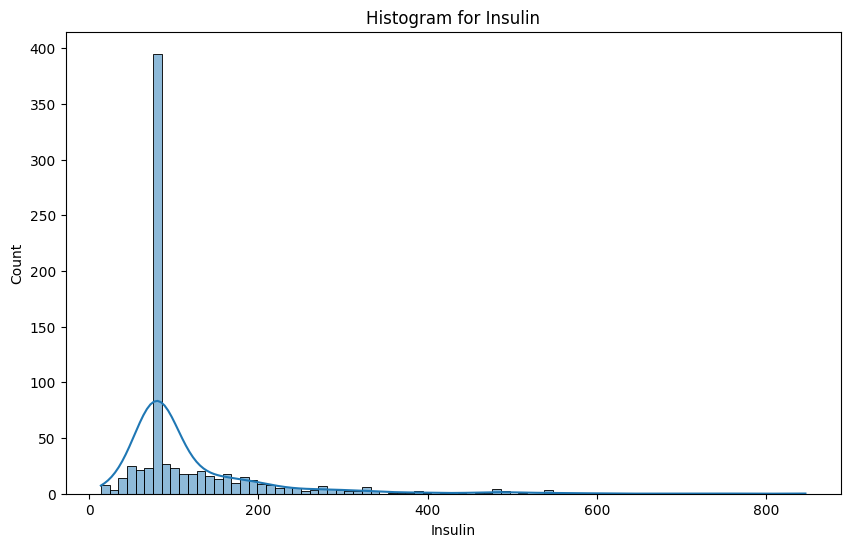

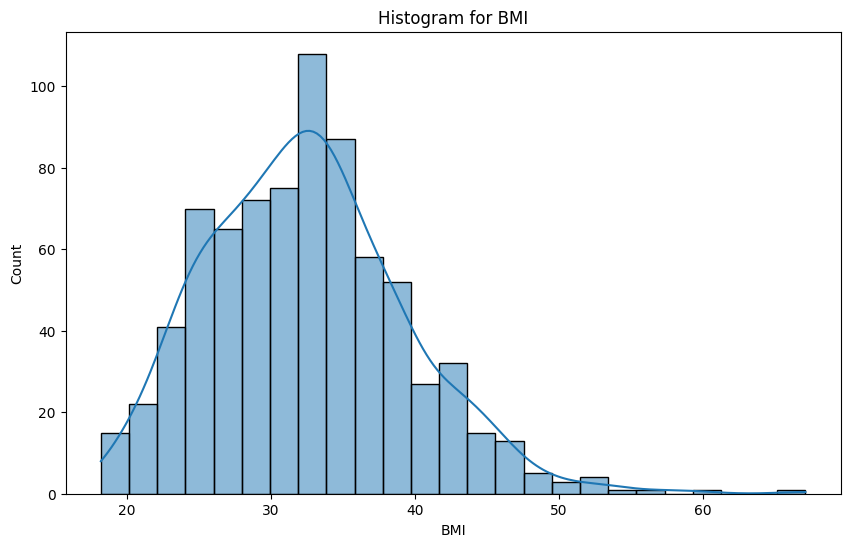

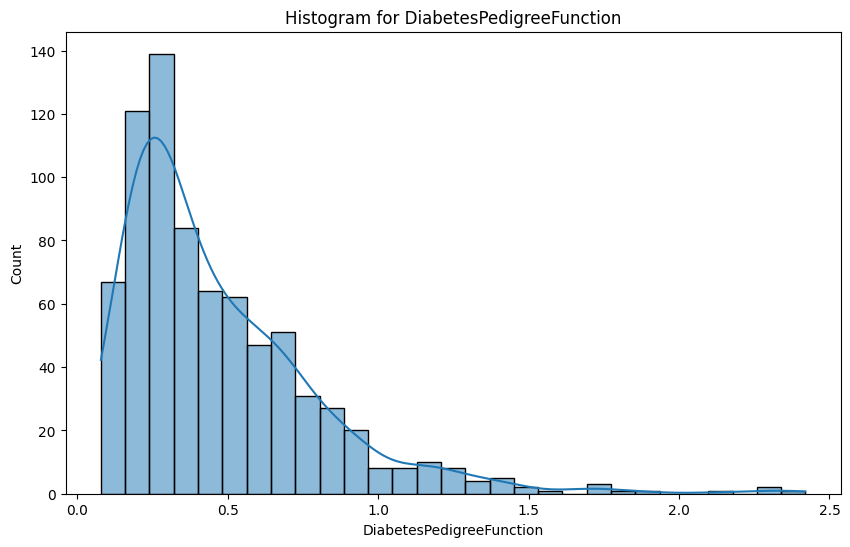

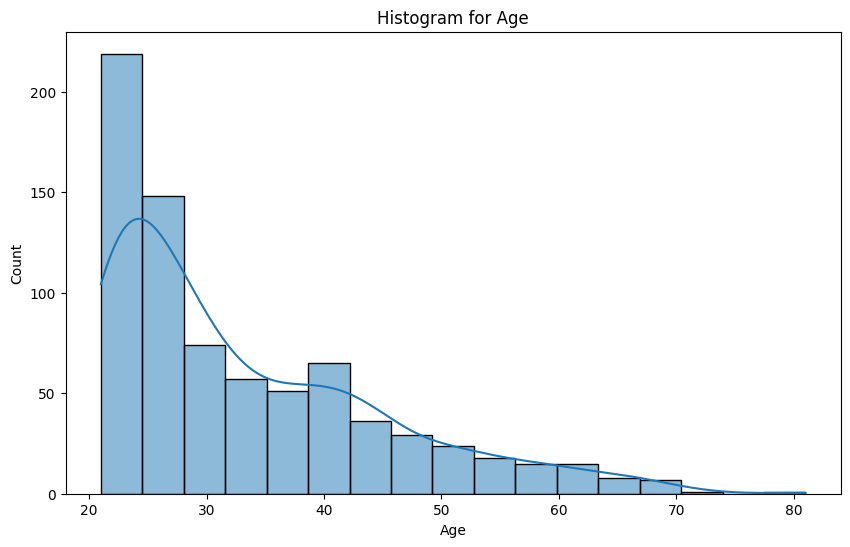

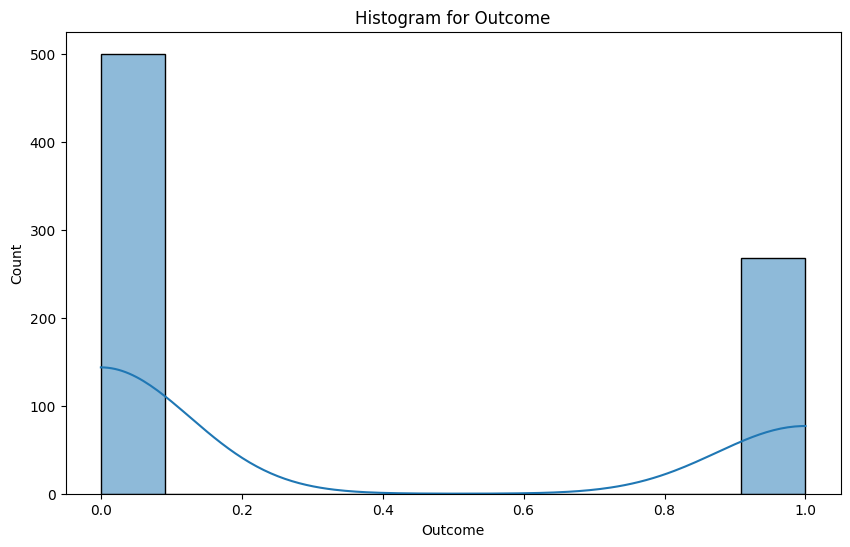

In [69]:
for feature in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature],kde=True)
    plt.title(f'Histogram for {feature}')
    plt.show()


In [70]:
# Here we segregate the dependent and independent variable
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [71]:
# Separate the datasets into train ans test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape,x_test.shape

((576, 8), (192, 8))

In [72]:
import pickle

def scaler_standard(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    #saving the model
    file = open('C:\\Users\\AKASH VISHWAKARMA\\OneDrive\\Desktop\\Python Program\\End to End Project Using Logistic Regression\\models\\standardScaler.pkl' , 'wb')
    pickle.dump(scaler,file)
    file.close()
    return x_train_scaled , x_test_scaled


In [73]:
x_train_scaled , x_test_scaled = scaler_standard(x_train , x_test)

In [74]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [75]:
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [77]:
from sklearn.model_selection import GridSearchCV
# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C' : np.logspace(-3,3-7),
    'solver' : ['newton-cg','lbfgs','liblinear']
}

In [78]:
logreg = LogisticRegression()
clf = GridSearchCV(
    logreg,
    param_grid = parameters,
    # Hyperparameter
    scoring = 'accuracy',
    cv=10
)
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([0.001     , 0.0009541 , 0.0009103 , 0.00086851, 0.00082864,
       0.0007906 , 0.00075431, 0.00071969, 0.00068665, 0.00065513,
       0.00062506, 0.00059636, 0.00056899, 0.00054287, 0.00051795,
       0.00049417, 0.00047149, 0.00044984, 0.00042919, 0.00040949,
       0.00039069, 0.00037276, 0.00035565, 0.00033932, 0.00032375,
       0.00030888, 0.00029471, 0.00028118, 0.00026827, 0.00025595,
       0.00024421, 0.000233  , 0.0002223 , 0.0002121 , 0.00020236,
       0.00019307, 0.00018421, 0.00017575, 0.00016768, 0.00015999,
       0.00015264, 0.00014563, 0.00013895, 0.00013257, 0.00012649,
       0.00012068, 0.00011514, 0.00010985, 0.00010481, 0.0001    ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [79]:
clf.best_params_

{'C': 0.0006866488450042998, 'penalty': 'l2', 'solver': 'liblinear'}

In [80]:
clf.best_score_

0.7447973381730187

### Let's see how our model performs on the test data set

In [81]:
y_pred = clf.predict(x_test_scaled)

In [82]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,  21],
       [ 24,  38]])

In [83]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [84]:
Accuracy  = (true_positive + true_negative) / (true_positive + false_negative +true_negative)
Accuracy

0.8596491228070176

In [85]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8384615384615385

In [86]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8195488721804511

In [87]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8288973384030418

In [88]:
import pickle
file = open("C:\\Users\\AKASH VISHWAKARMA\\OneDrive\\Desktop\\Python Program\\End to End Project Using Logistic Regression\\models\\modelForPrediction.pkl" , "wb")
pickle.dump(log_reg,file)
file.close()